## Importing Dependencies

In [1]:
import random
random.seed(1)
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

In [2]:
import os 
import json 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
%matplotlib inline

## Data Collection

In [3]:
img_size = 256
batch_size = 32

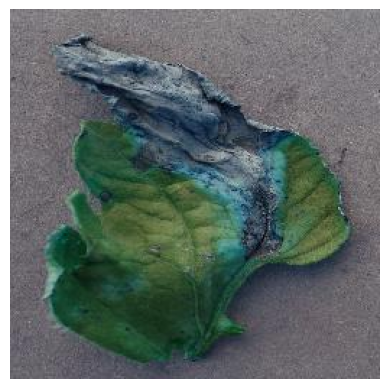

In [4]:
image_path = r"C:\Users\US593\Work\Datasets\Plant_Disease_Prediction\train\Tomato___Early_blight\1dad664e-ec73-474e-aaf9-a832ca212e3f___RS_Erly.B 7533.jpg "
img = cv2.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
base_dir = r"C:\Users\US593\Work\Datasets\Plant_Disease_Prediction"

In [6]:
data_gen = ImageDataGenerator(
    rescale=1/255,
    validation_split = 0.2
)

In [7]:
train_generator = data_gen.flow_from_directory(
    os.path.join(base_dir,'train'),
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset='training',
    class_mode='categorical'
)

Found 34771 images belonging to 38 classes.


In [8]:
validation_generator = data_gen.flow_from_directory(
    os.path.join(base_dir,'val'),
    target_size = (img_size,img_size),
    batch_size = batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 2160 images belonging to 38 classes.


## Model Building

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,
    epochs=5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size
)

## Saving Model

In [13]:
model.save('model.h5')

## Model Evaluation

In [14]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
67/67 [==============================] - 6s 85ms/step - loss: 0.6193 - accuracy: 0.8615
Validation Accuracy: 86.15%


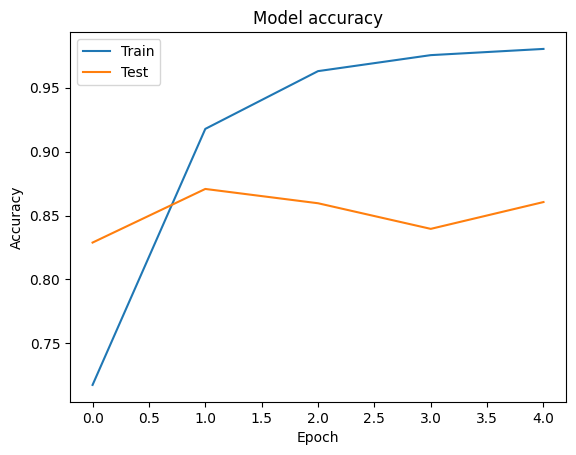

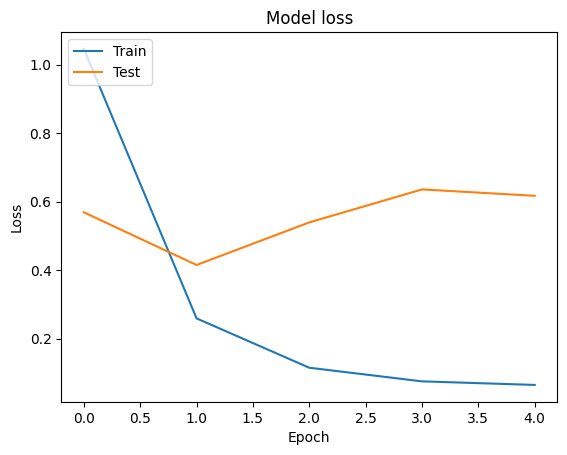

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Class Indices Dict

In [21]:
class_indices = {v:k for k, v in train_generator.class_indices.items()}

In [22]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [24]:
json.dump(class_indices,open('class_indices.json','w'))

## Predictive System

In [25]:
def predict(image_path,model,target_size=(256,256)):
    img = cv2.imread(image_path)
    img = cv2.resize(img,target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array.astype('float32')/255.
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions,axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [26]:
predict('blue_berry_health_test.jpg',model)

1/1 [==============================] - 1s 533ms/step


'Blueberry___healthy'